In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dd.dd import Analysis_DD
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240418_NBFF_NoisyGRU_Final4/max_epochs=500 latent_size=64 seed=0/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT, use_train_dm=True)

pathDT = pathTT + "20240420_Fig1_NBFF_LFADS_Sweep/gen_model=NoisyGRU_RNN prefix=20240418_NBFF_NoisyGRU_Final4 seed=0 max_epochs=500/"
an_DT = Analysis_DD(run_name = "DT", filepath = pathDT, model_type = "LFADS")

/home/csverst/Github/CtDBenchmark/



Iteration 500/10000
q = 1.11E-02 +/- 4.82E-02
dq = 4.82E-05 +/- 1.92E-04

Iteration 1000/10000
q = 2.40E-03 +/- 1.16E-02
dq = 5.33E-06 +/- 2.59E-05

Iteration 1500/10000
q = 9.84E-04 +/- 4.71E-03
dq = 1.43E-06 +/- 7.32E-06

Iteration 2000/10000
q = 5.27E-04 +/- 2.41E-03
dq = 5.75E-07 +/- 3.00E-06

Iteration 2500/10000
q = 3.23E-04 +/- 1.37E-03
dq = 2.85E-07 +/- 1.44E-06

Iteration 3000/10000
q = 2.16E-04 +/- 8.64E-04
dq = 1.60E-07 +/- 7.38E-07

Iteration 3500/10000
q = 1.53E-04 +/- 5.84E-04
dq = 9.94E-08 +/- 4.40E-07

Iteration 4000/10000
q = 1.12E-04 +/- 4.09E-04
dq = 6.68E-08 +/- 2.86E-07

Iteration 4500/10000
q = 8.38E-05 +/- 2.94E-04
dq = 4.71E-08 +/- 1.93E-07

Iteration 5000/10000
q = 6.37E-05 +/- 2.15E-04
dq = 3.43E-08 +/- 1.35E-07

Iteration 5500/10000
q = 4.89E-05 +/- 1.60E-04
dq = 2.55E-08 +/- 9.56E-08

Iteration 6000/10000
q = 3.78E-05 +/- 1.21E-04
dq = 1.91E-08 +/- 6.87E-08

Iteration 6500/10000
q = 2.95E-05 +/- 9.21E-05
dq = 1.45E-08 +/- 5.05E-08

Iteration 7000/10000
q = 

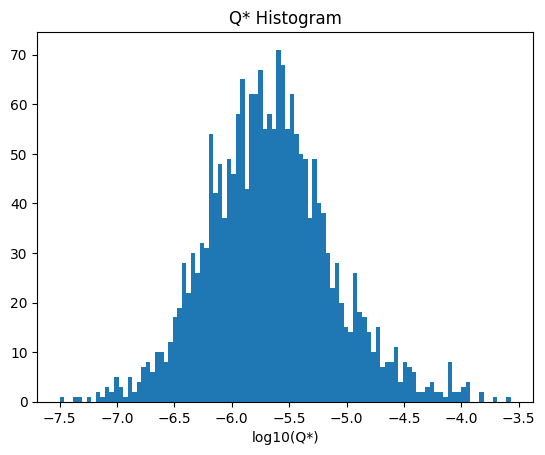

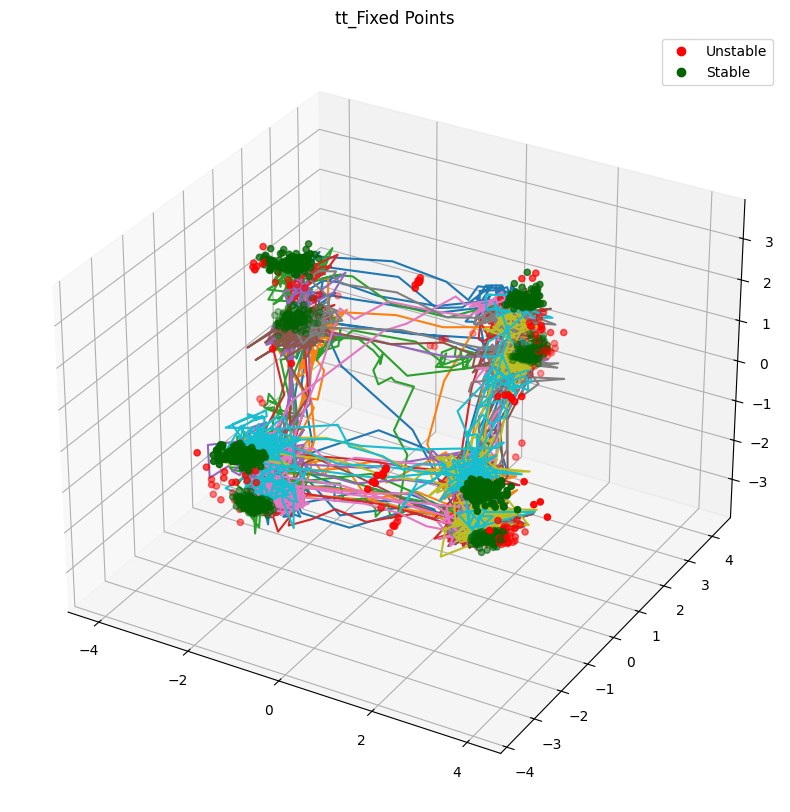

In [3]:
tt_fps = an_TT.plot_fps(
    inputs = torch.zeros(3),
    learning_rate=1e-3,
    noise_scale=0.0,
    n_inits = 2000,
    max_iters=10000,
    device = "cpu",
)

[[ 5.6119550e-02  2.3838302e-01 -1.4551343e-01 ... -4.2067155e-01
   1.3968319e-01  1.0092887e-01]
 [-8.7791127e-01  1.3930753e-01 -2.8728580e-01 ... -1.4132446e-01
  -7.0270854e-01  5.1847428e-01]
 [-6.6483408e-02 -8.4913836e-04  2.5932331e-02 ...  7.0405000e-01
   1.9172479e-01 -5.8196354e-01]
 ...
 [-9.3077707e-01 -3.9144289e-01  1.0234725e-01 ...  7.8556740e-01
  -7.4191970e-01  3.9399701e-01]
 [-8.4589368e-01  2.2023293e-01  4.1406378e-01 ... -5.6384391e-01
  -7.1048461e-02 -1.3907380e-01]
 [-7.0720702e-02 -2.8575370e-01 -2.6789385e-01 ...  7.8333110e-01
  -7.7364661e-02  3.3211184e-01]]


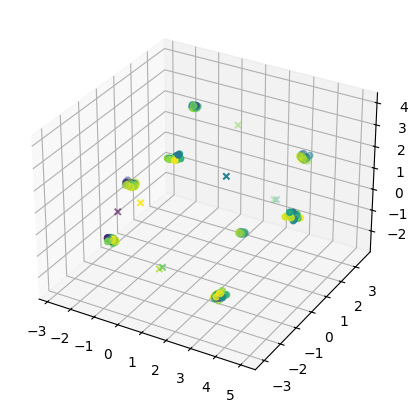

In [4]:
from sklearn.decomposition import PCA

q_thresh = 8e-7
q_flag = tt_fps.qstar < q_thresh

stable= tt_fps.is_stable
stable = stable[q_flag]

isStable = stable == 1
unStable = stable == 0

qstar = tt_fps.qstar
qstar = qstar[q_flag]
x_star = tt_fps.xstar
print(x_star)
x_star = x_star[q_flag, :]
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_star)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[isStable, 0], x_pca[isStable, 1], x_pca[isStable, 2], c=qstar[isStable], cmap='viridis', marker='o', label='Stable')
ax.scatter(x_pca[unStable, 0], x_pca[unStable, 1], x_pca[unStable, 2], c=qstar[unStable], cmap='viridis', marker='x', label='Unstable')



Iteration 500/10000
q = 2.01E-02 +/- 5.83E-02
dq = 8.00E-05 +/- 2.33E-04

Iteration 1000/10000
q = 4.97E-03 +/- 1.43E-02
dq = 1.01E-05 +/- 2.92E-05

Iteration 1500/10000
q = 2.19E-03 +/- 6.28E-03
dq = 2.98E-06 +/- 8.64E-06

Iteration 2000/10000
q = 1.21E-03 +/- 3.45E-03
dq = 1.27E-06 +/- 3.72E-06

Iteration 2500/10000
q = 7.47E-04 +/- 2.11E-03
dq = 6.61E-07 +/- 1.94E-06

Iteration 3000/10000
q = 4.94E-04 +/- 1.38E-03
dq = 3.85E-07 +/- 1.13E-06

Iteration 3500/10000
q = 3.41E-04 +/- 9.39E-04
dq = 2.41E-07 +/- 7.01E-07

Iteration 4000/10000
q = 2.43E-04 +/- 6.65E-04
dq = 1.58E-07 +/- 4.53E-07

Iteration 4500/10000
q = 1.78E-04 +/- 4.87E-04
dq = 1.07E-07 +/- 3.04E-07

Iteration 5000/10000
q = 1.32E-04 +/- 3.68E-04
dq = 7.61E-08 +/- 2.12E-07

Iteration 5500/10000
q = 9.99E-05 +/- 2.86E-04
dq = 5.50E-08 +/- 1.51E-07

Iteration 6000/10000
q = 7.62E-05 +/- 2.28E-04
dq = 4.08E-08 +/- 1.21E-07

Iteration 6500/10000
q = 5.88E-05 +/- 1.86E-04
dq = 2.94E-08 +/- 8.40E-08

Iteration 7000/10000
q = 

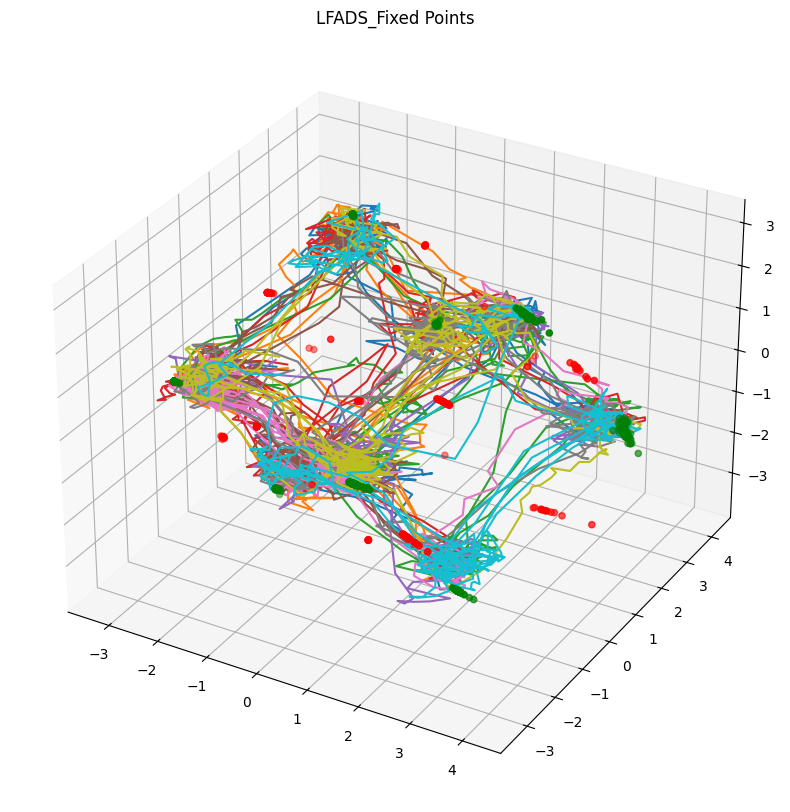

In [5]:
dt_fps = an_DT.plot_fps(
    inputs = torch.zeros(3),
    learning_rate=1e-3,
    noise_scale=0.0,
    n_inits = 2000,
    max_iters=10000,
    device = "cpu",
)

In [6]:
print(dt_fps)

[[-0.02728217 -0.30636722 -0.01033768 ... -0.56649876 -0.1509434
  -0.47278625]
 [ 0.4771885   0.15808043  0.07809114 ...  0.46203834  0.06663696
  -0.45306385]
 [-0.35030156  0.15137592 -0.2613114  ... -0.43317822 -0.3538347
   0.4302846 ]
 ...
 [-0.11232085 -0.1627927  -0.40242136 ... -0.5089485  -0.16313015
  -0.5624097 ]
 [-0.11596113  0.48064536 -0.23401797 ...  0.49519366 -0.17688017
   0.44434902]
 [-0.3501969   0.15143867 -0.26133698 ... -0.43269834 -0.35328874
   0.4300449 ]]


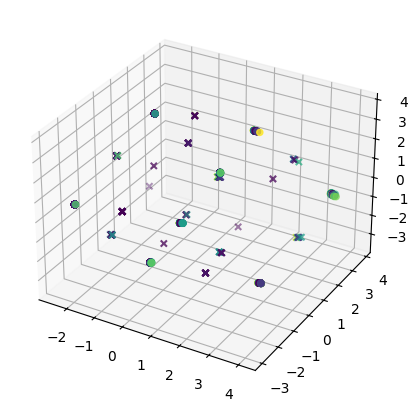

In [7]:
q_thresh = 8e-7
q_flag = dt_fps.qstar < q_thresh

stable= dt_fps.is_stable
stable = stable[q_flag]

isStable = stable == 1
unStable = stable == 0

qstar = dt_fps.qstar
qstar = qstar[q_flag]
x_star = dt_fps.xstar
print(x_star)
x_star = x_star[q_flag, :]
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_star)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[isStable, 0], x_pca[isStable, 1], x_pca[isStable, 2], c=qstar[isStable], cmap='viridis', marker='o', label='Stable')
ax.scatter(x_pca[unStable, 0], x_pca[unStable, 1], x_pca[unStable, 2], c=qstar[unStable], cmap='viridis', marker='x', label='Unstable')
